In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from astropy import units as u
from astropy import constants as c

In [2]:
omega = np.load('HERA_NicCST_omega.py.npy')
nfreq = omega.shape[0]
freq = np.linspace(100,200,num=nfreq)

In [3]:
freq_zem,omega_zem = np.loadtxt('solid_angle_nfreq1024.txt',unpack=True)

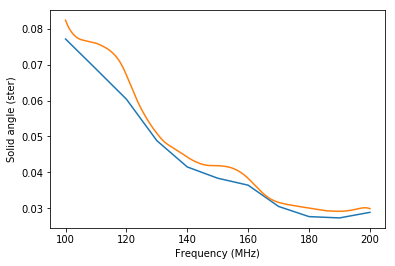

In [5]:
plt.plot(freq,omega)
plt.plot(freq_zem,omega_zem)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Solid angle (ster)')
plt.show()

In [6]:
freq = freq_zem*u.MHz
omega = omega_zem
lmbda = (c.c/freq).to(u.m)

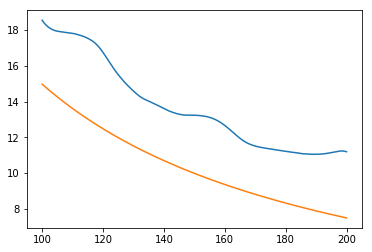

In [7]:
beam_diameter = 2.*np.degrees(np.power(omega/np.pi,0.5))
fwhm = np.degrees(1.22*(lmbda/(14.*u.m)).to(u.dimensionless_unscaled).value)
plt.plot(freq,beam_diameter)
plt.plot(freq,fwhm)

In [8]:
A_e_from_omega = np.power(lmbda,2)/omega
D = 14.*u.m
A_geo = np.pi*np.power(D/2,2)
print A_geo
print A_e_from_omega

153.938040026 m2
[ 109.17626556  109.24484153  109.31439974 ...,   75.04496279   75.03164939
   75.01842238] m2


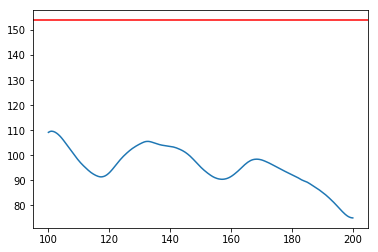

In [9]:
plt.plot(freq,A_e_from_omega)
plt.axhline(A_geo.value,color='red')

In [10]:
eta = (A_e_from_omega/A_geo).value

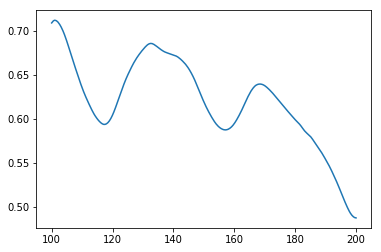

In [11]:
plt.plot(freq,eta)

In [12]:
T_sys_deBoer = (100. + 120.*np.power((freq/(150*u.MHz)).decompose(),-2.55))*u.K

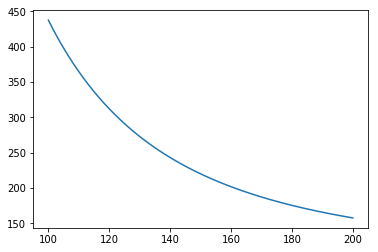

In [13]:
plt.plot(freq,T_sys_deBoer)

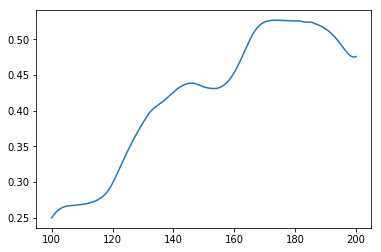

In [14]:
AoverT = A_e_from_omega / T_sys_deBoer
plt.plot(freq,AoverT)

In [15]:
SEFD = (2.*c.k_B*T_sys_deBoer/A_e_from_omega).to(u.Jy)

In [16]:
SEFD.unit

Unit("Jy")

Text(0,0.5,'SEFD [Jy]')

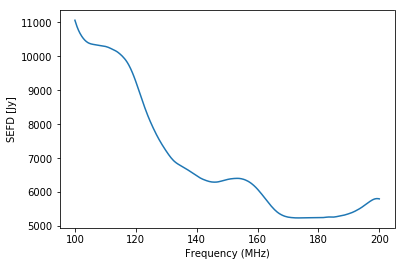

In [17]:
plt.plot(freq,SEFD)
plt.xlabel('Frequency (MHz)')
plt.ylabel('SEFD [Jy]')


In [18]:
print SEFD

[ 11064.11811083  11035.9483539   11007.78843846 ...,   5805.02849405
   5803.40867057   5801.786188  ] Jy


In [19]:
N_ant = 15.
t_int = 10.*u.min
dnu = 80*u.MHz
N_pol = 2.
dI = (SEFD/np.sqrt(N_pol * N_ant * (N_ant-1) * t_int * dnu)).to(u.Jy)

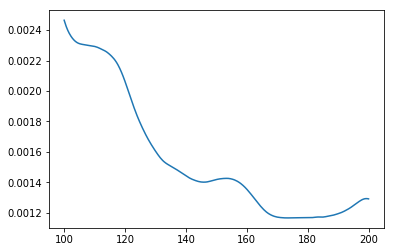

In [20]:
plt.plot(freq,dI)